In [1]:
#importing libraries
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
 
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
from tensorflow.keras.utils import to_categorical, plot_model
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [2]:
#downloading cifar10 data
(X_train, y_train), (X_test, y_test) = datasets.cifar10.load_data()
print("Train data shape: ", X_train.shape, y_train.shape)
print("Test data shape: ", X_test.shape, y_test.shape)

170500096/170498071 [==============================] - 6s 0us/step
Train data shape:  (50000, 32, 32, 3) (50000, 1)
Test data shape:  (10000, 32, 32, 3) (10000, 1)


In [3]:
#normalize pixel values to be between 0 and 1
X_train, X_test = X_train / 255.0, X_test / 255.0

In [4]:
#combining train and test data
X_full = np.concatenate((X_train, X_test), axis = 0)
y_full = np.concatenate((y_train, y_test), axis = 0)
print(X_full.shape)
print(y_full.shape)

(60000, 32, 32, 3)
(60000, 1)


In [5]:
#dividing data into train, validation and test in 70:20:10 ratio
X_train, X_test, y_train, y_test = train_test_split(X_full, y_full, test_size = 6000, stratify = y_full, random_state = 42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size = 12000, stratify = y_train, random_state = 42)
print("Train data shape: ", X_train.shape, y_train.shape)
print("Validation data shape: ", X_val.shape, y_val.shape)
print("Test data shape: ", X_test.shape, y_test.shape)

Train data shape:  (42000, 32, 32, 3) (42000, 1)
Validation data shape:  (12000, 32, 32, 3) (12000, 1)
Test data shape:  (6000, 32, 32, 3) (6000, 1)


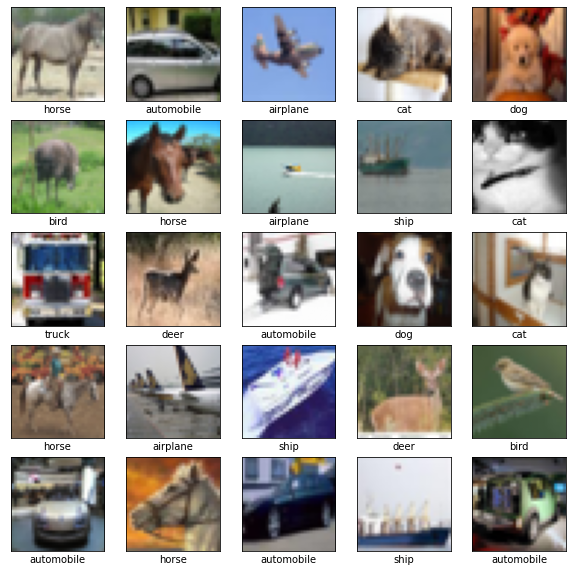

In [6]:
#displaying sample images
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(X_train[i], cmap=plt.cm.binary)
    # The CIFAR labels happen to be arrays, 
    # which is why you need the extra index
    plt.xlabel(class_names[y_train[i][0]])
plt.show()

In [7]:
#one hot encoding
y_train = to_categorical(y_train,10)
y_test = to_categorical(y_test,10)
y_val = to_categorical(y_val,10)

In [8]:
#Base CNN model without any regularization 

In [9]:
#callbacks
earlystop = EarlyStopping(patience=10)

learning_rate_reduction = ReduceLROnPlateau(monitor='val_accuracy', 
                                            patience=2, 
                                            verbose=1, 
                                            factor=0.5, 
                                            min_lr=0.00001)

callbacks = [earlystop, learning_rate_reduction]

In [10]:
#defining model structure
model = models.Sequential([
               layers.Conv2D(64, (3, 3), activation='relu', input_shape=(32, 32, 3)),
               layers.BatchNormalization(),
               layers.Conv2D(64, (3, 3), activation='relu', padding='same'), 
               layers.BatchNormalization(),
               layers.MaxPooling2D(2, 2),
    
               layers.Conv2D(96, (3, 3), activation='relu', padding='same'),
               layers.BatchNormalization(),
               layers.Conv2D(96, (3, 3), activation='relu', padding='same'),
               layers.BatchNormalization(),
               layers.MaxPooling2D(2, 2),
    
               layers.Conv2D(128, (3, 3), activation='relu', padding='same'),
               layers.BatchNormalization(),
               layers.Conv2D(128, (3, 3), activation='relu', padding='same'),
               layers.BatchNormalization(),
               layers.MaxPooling2D(2, 2), 
    
               layers.Flatten(),
    
               layers.Dense(256, activation='relu'),
               layers.BatchNormalization(),
    
               layers.Dense(192, activation='relu'),
               layers.BatchNormalization(),
    
               layers.Dense(128, activation='relu'),
               layers.BatchNormalization(),

               layers.Dense(10, activation='softmax')])

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 30, 30, 64)        1792      
_________________________________________________________________
batch_normalization (BatchNo (None, 30, 30, 64)        256       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 30, 30, 64)        36928     
_________________________________________________________________
batch_normalization_1 (Batch (None, 30, 30, 64)        256       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 15, 15, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 15, 15, 96)        55392     
_________________________________________________________________
batch_normalization_2 (Batch (None, 15, 15, 96)        3

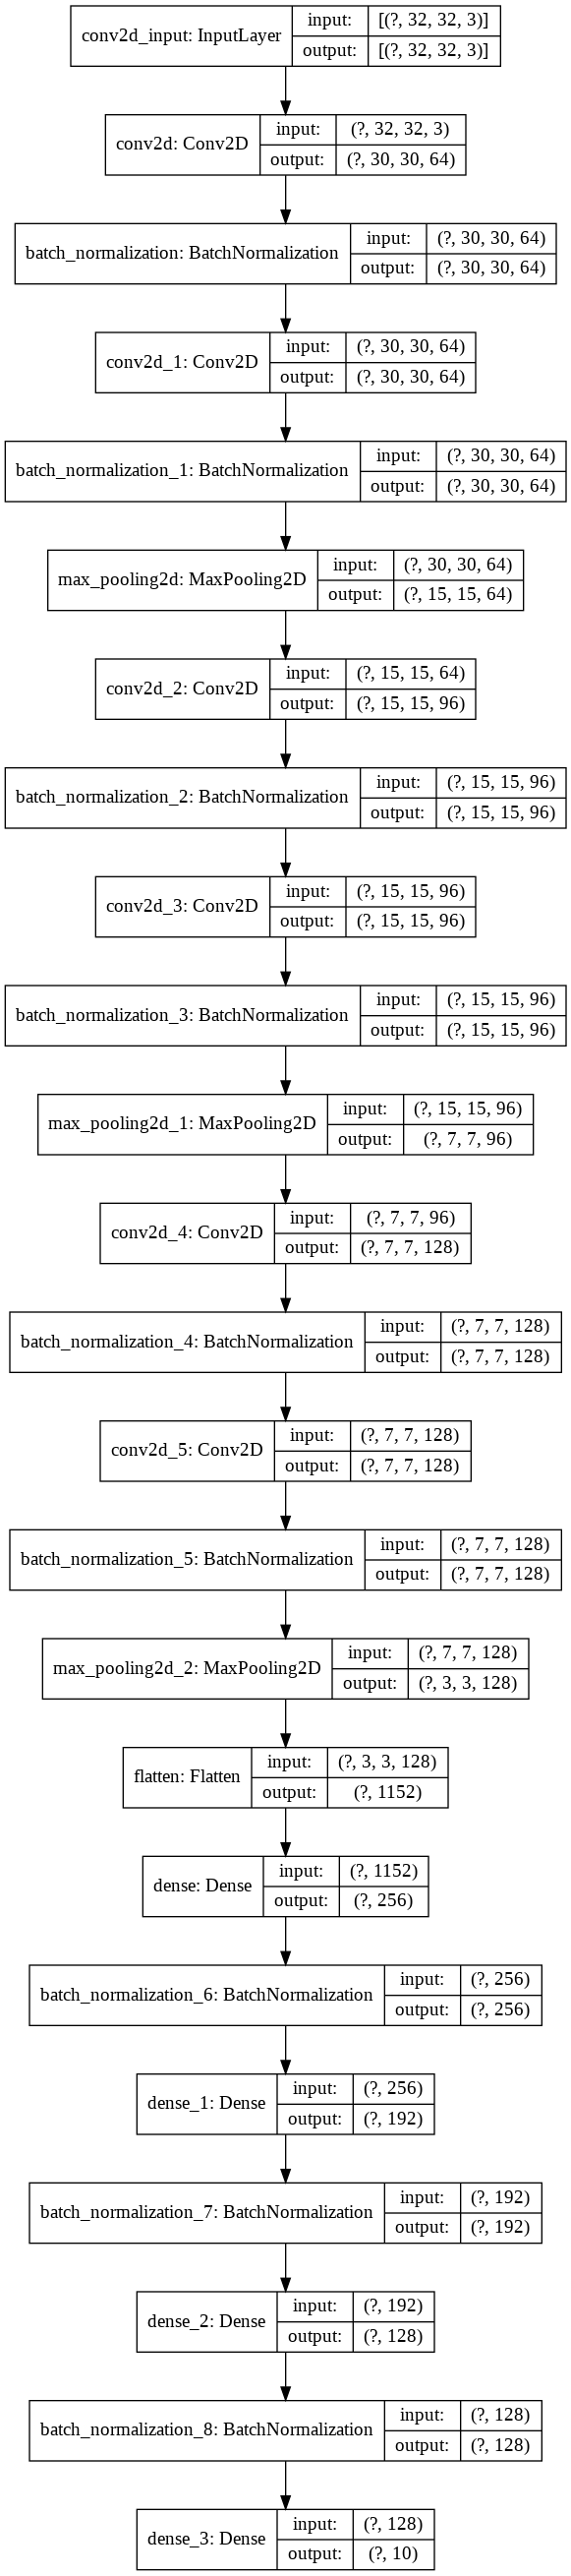

In [11]:
#plotting model structure
plot_model(model, to_file='mlp-mnist.png', show_shapes=True)

In [12]:
#model fitting
model.compile(optimizer = 'adam',
              loss = 'categorical_crossentropy',
              metrics = ['accuracy'])

epochs = 25
history = model.fit(X_train, y_train, epochs = epochs, validation_data = (X_val, y_val), callbacks = callbacks)

Epoch 1/25
1313/1313 [==============================] - 13s 10ms/step - loss: 1.3766 - accuracy: 0.5085 - val_loss: 1.1655 - val_accuracy: 0.5911
Epoch 2/25
1313/1313 [==============================] - 12s 10ms/step - loss: 0.8945 - accuracy: 0.6865 - val_loss: 0.7832 - val_accuracy: 0.7248
Epoch 3/25
1313/1313 [==============================] - 13s 10ms/step - loss: 0.7258 - accuracy: 0.7495 - val_loss: 0.7992 - val_accuracy: 0.7236
Epoch 4/25
1313/1313 [==============================] - 13s 10ms/step - loss: 0.6086 - accuracy: 0.7912 - val_loss: 0.7593 - val_accuracy: 0.7456
Epoch 5/25
1313/1313 [==============================] - 13s 10ms/step - loss: 0.5060 - accuracy: 0.8263 - val_loss: 0.7405 - val_accuracy: 0.7513
Epoch 6/25
1313/1313 [==============================] - 13s 10ms/step - loss: 0.4174 - accuracy: 0.8578 - val_loss: 0.6942 - val_accuracy: 0.7741
Epoch 7/25
1313/1313 [==============================] - 12s 9ms/step - loss: 0.3474 - accuracy: 0.8790 - val_loss: 0.6383 - 

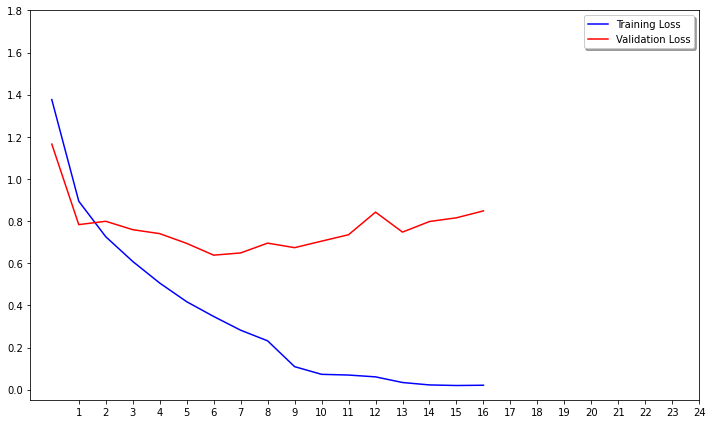

In [13]:
#loss vs epoch plot
fig, ax1 = plt.subplots(1, 1, figsize=(10, 6))
ax1.plot(history.history['loss'], color='b', label="Training Loss")
ax1.plot(history.history['val_loss'], color='r', label="Validation Loss")
ax1.set_xticks(np.arange(1, epochs, 1))
ax1.set_yticks(np.arange(0, 2, 0.2))

legend = plt.legend(loc='best', shadow=True)
plt.tight_layout()
plt.show()

In [14]:
#checking model performance on test data
test_loss, test_acc = model.evaluate(X_test,  y_test, verbose = 2)
print('Test loss:', test_loss) 
print('Test accuracy:', test_acc)

188/188 - 1s - loss: 0.8848 - accuracy: 0.8308
Test loss: 0.8847623467445374
Test accuracy: 0.8308333158493042


In [15]:
## Model with Dropout as regularization

In [16]:
#defining model structure
model = models.Sequential([
               layers.Conv2D(64, (3, 3), activation='relu', input_shape=(32, 32, 3)),
               layers.BatchNormalization(),
               layers.Conv2D(64, (3, 3), activation='relu', padding='same'), 
               layers.BatchNormalization(),
               layers.MaxPooling2D(2, 2),
               layers.Dropout(0.5),
    
               layers.Conv2D(96, (3, 3), activation='relu', padding='same'),
               layers.BatchNormalization(),
               layers.Conv2D(96, (3, 3), activation='relu', padding='same'),
               layers.BatchNormalization(),
               layers.MaxPooling2D(2, 2),
               layers.Dropout(0.5),
    
               layers.Conv2D(128, (3, 3), activation='relu', padding='same'),
               layers.BatchNormalization(),
               layers.Conv2D(128, (3, 3), activation='relu', padding='same'),
               layers.BatchNormalization(),
               layers.MaxPooling2D(2, 2), 
               layers.Dropout(0.5),
    
               layers.Flatten(),
    
               layers.Dense(256, activation='relu'),
               layers.BatchNormalization(),
               layers.Dropout(0.25),
    
               layers.Dense(192, activation='relu'),
               layers.BatchNormalization(),
               layers.Dropout(0.25),
    
               layers.Dense(128, activation='relu'),
               layers.BatchNormalization(),
               layers.Dropout(0.25),

               layers.Dense(10, activation='softmax')])

model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 30, 30, 64)        1792      
_________________________________________________________________
batch_normalization_9 (Batch (None, 30, 30, 64)        256       
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 30, 30, 64)        36928     
_________________________________________________________________
batch_normalization_10 (Batc (None, 30, 30, 64)        256       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 15, 15, 64)        0         
_________________________________________________________________
dropout (Dropout)            (None, 15, 15, 64)        0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 15, 15, 96)       

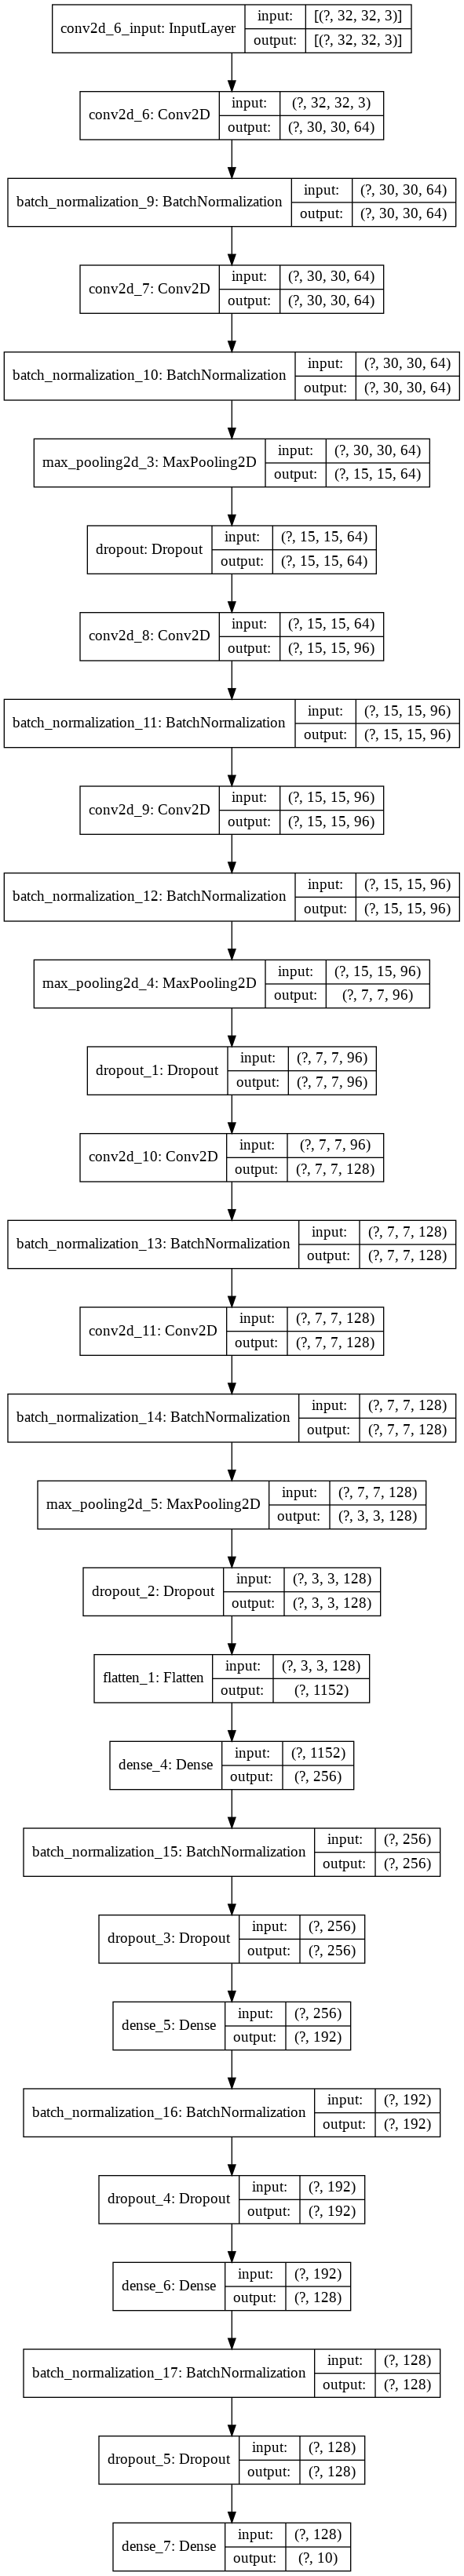

In [17]:
#plotting model structure
plot_model(model, to_file='mlp-mnist.png', show_shapes=True)

In [18]:
#model fitting
model.compile(optimizer = 'adam',
              loss = 'categorical_crossentropy',
              metrics = ['accuracy'])

epochs = 25
history = model.fit(X_train, y_train, epochs = epochs, validation_data = (X_val, y_val), callbacks = callbacks)

Epoch 1/25
1313/1313 [==============================] - 13s 10ms/step - loss: 1.8321 - accuracy: 0.3453 - val_loss: 1.4128 - val_accuracy: 0.4893
Epoch 2/25
1313/1313 [==============================] - 13s 10ms/step - loss: 1.3228 - accuracy: 0.5296 - val_loss: 1.1224 - val_accuracy: 0.5939
Epoch 3/25
1313/1313 [==============================] - 13s 10ms/step - loss: 1.1143 - accuracy: 0.6103 - val_loss: 1.1935 - val_accuracy: 0.5905
Epoch 4/25
1309/1313 [============================>.] - ETA: 0s - loss: 0.9757 - accuracy: 0.6642
Epoch 00004: ReduceLROnPlateau reducing learning rate to 0.0005000000237487257.
1313/1313 [==============================] - 13s 10ms/step - loss: 0.9760 - accuracy: 0.6640 - val_loss: 1.3252 - val_accuracy: 0.5382
Epoch 5/25
1313/1313 [==============================] - 13s 10ms/step - loss: 0.8364 - accuracy: 0.7140 - val_loss: 0.6342 - val_accuracy: 0.7763
Epoch 6/25
1313/1313 [==============================] - 13s 10ms/step - loss: 0.7792 - accuracy: 0.7331

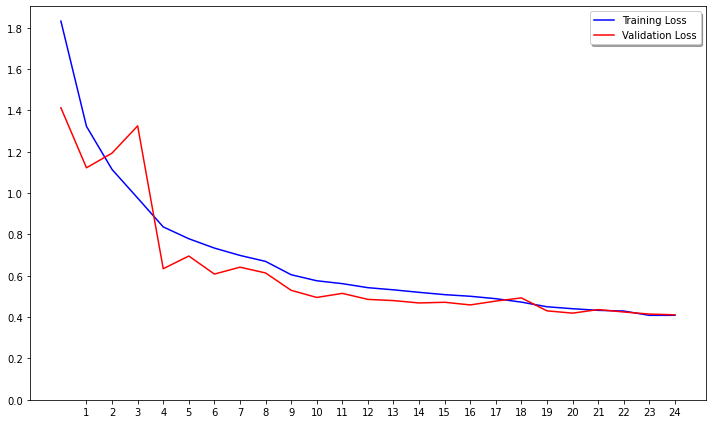

In [19]:
#loss vs epoch plot
fig, ax1 = plt.subplots(1, 1, figsize=(10, 6))
ax1.plot(history.history['loss'], color='b', label="Training Loss")
ax1.plot(history.history['val_loss'], color='r', label="Validation Loss")
ax1.set_xticks(np.arange(1, epochs, 1))
ax1.set_yticks(np.arange(0, 2, 0.2))

legend = plt.legend(loc='best', shadow=True)
plt.tight_layout()
plt.show()

In [20]:
#checking model performance on test data
test_loss, test_acc = model.evaluate(X_test, y_test, verbose = 2)
print('Test loss:', test_loss) 
print('Test accuracy:', test_acc)

188/188 - 1s - loss: 0.4180 - accuracy: 0.8558
Test loss: 0.4179997146129608
Test accuracy: 0.8558333516120911


In [21]:
## Model with Data Augmentation as regularization

In [22]:
train_datagen = ImageDataGenerator(width_shift_range = 0.1, height_shift_range = 0.1, 
                                   horizontal_flip = True, rotation_range = 20,
                                   shear_range = 0.2, zoom_range = 0.2)
 
train_generator = train_datagen.flow(X_train, y_train,batch_size = 32)

In [23]:
#defining model structure
model = models.Sequential([
               layers.Conv2D(64, (3, 3), activation='relu', input_shape=(32, 32, 3)),
               layers.BatchNormalization(),
               layers.Conv2D(64, (3, 3), activation='relu', padding='same'), 
               layers.BatchNormalization(),
               layers.MaxPooling2D(2, 2),
    
               layers.Conv2D(96, (3, 3), activation='relu', padding='same'),
               layers.BatchNormalization(),
               layers.Conv2D(96, (3, 3), activation='relu', padding='same'),
               layers.BatchNormalization(),
               layers.MaxPooling2D(2, 2),
    
               layers.Conv2D(128, (3, 3), activation='relu', padding='same'),
               layers.BatchNormalization(),
               layers.Conv2D(128, (3, 3), activation='relu', padding='same'),
               layers.BatchNormalization(),
               layers.MaxPooling2D(2, 2), 
    
               layers.Flatten(),
    
               layers.Dense(256, activation='relu'),
               layers.BatchNormalization(),
    
               layers.Dense(192, activation='relu'),
               layers.BatchNormalization(),
    
               layers.Dense(128, activation='relu'),
               layers.BatchNormalization(),
 
               layers.Dense(10, activation='softmax')])
 
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_12 (Conv2D)           (None, 30, 30, 64)        1792      
_________________________________________________________________
batch_normalization_18 (Batc (None, 30, 30, 64)        256       
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 30, 30, 64)        36928     
_________________________________________________________________
batch_normalization_19 (Batc (None, 30, 30, 64)        256       
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 15, 15, 64)        0         
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 15, 15, 96)        55392     
_________________________________________________________________
batch_normalization_20 (Batc (None, 15, 15, 96)       

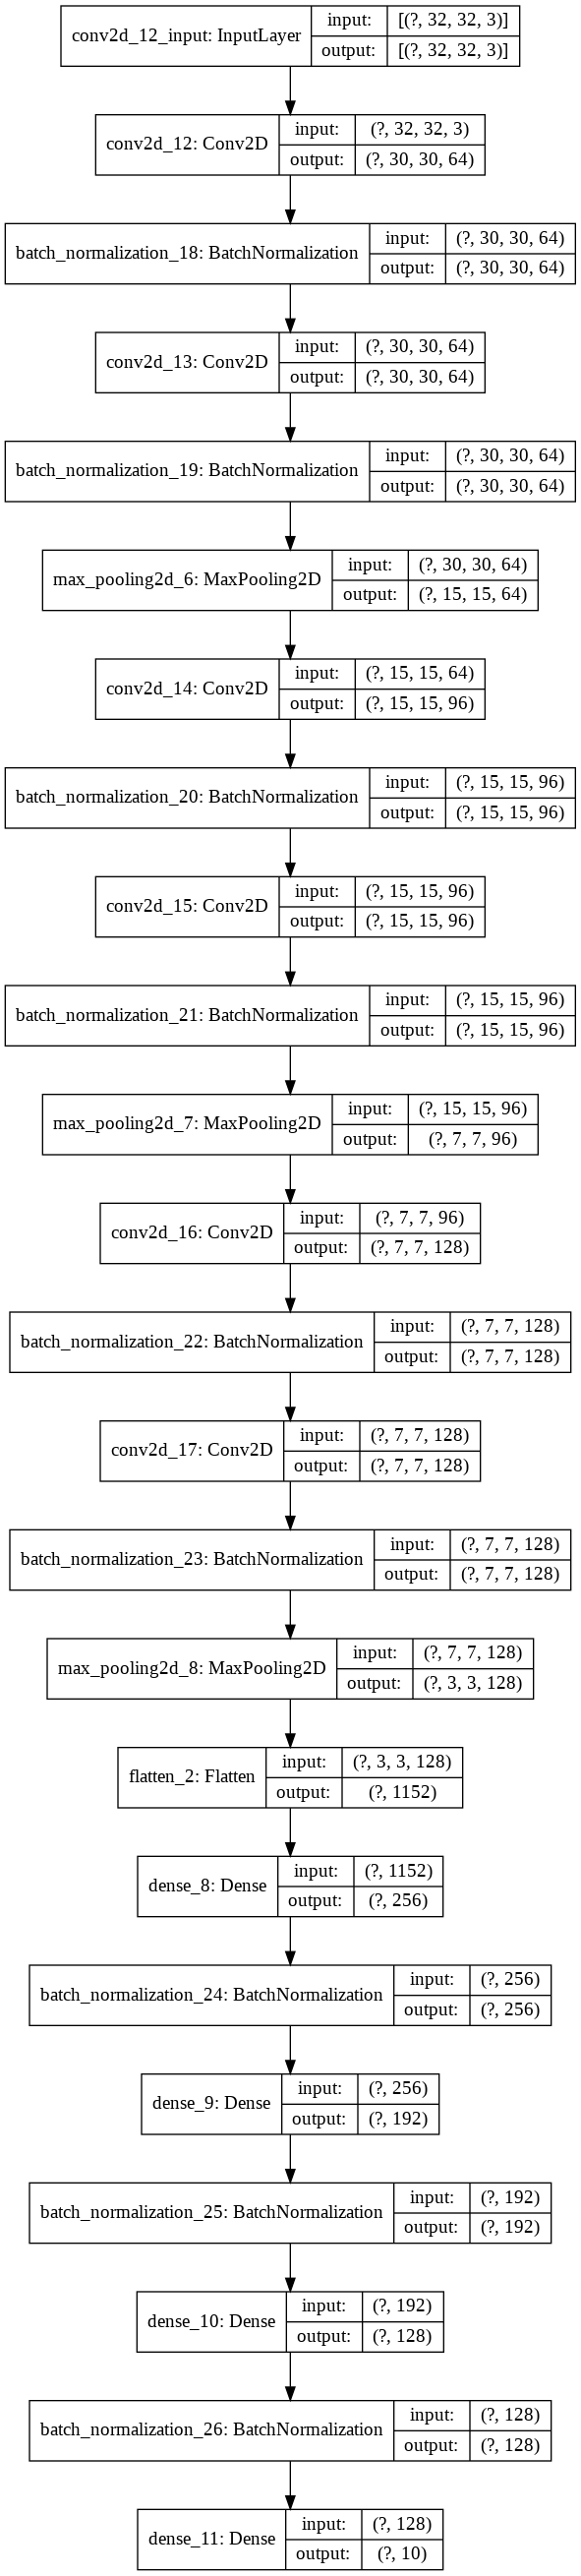

In [24]:
#plotting model structure
plot_model(model, to_file='mlp-mnist.png', show_shapes=True)

In [25]:
#model fitting
model.compile(optimizer = 'adam',
              loss = 'categorical_crossentropy',
              metrics = ['accuracy'])
 
epochs = 25
history = model.fit(train_generator, epochs = epochs, validation_data = (X_val, y_val), callbacks = callbacks)

Epoch 1/25
1313/1313 [==============================] - 28s 21ms/step - loss: 1.5640 - accuracy: 0.4417 - val_loss: 1.2978 - val_accuracy: 0.5469
Epoch 2/25
1313/1313 [==============================] - 27s 20ms/step - loss: 1.1753 - accuracy: 0.5856 - val_loss: 1.0072 - val_accuracy: 0.6469
Epoch 3/25
1313/1313 [==============================] - 27s 20ms/step - loss: 0.9912 - accuracy: 0.6535 - val_loss: 1.0543 - val_accuracy: 0.6472
Epoch 4/25
1313/1313 [==============================] - 26s 20ms/step - loss: 0.8871 - accuracy: 0.6959 - val_loss: 0.8160 - val_accuracy: 0.7191
Epoch 5/25
1313/1313 [==============================] - 26s 20ms/step - loss: 0.8108 - accuracy: 0.7208 - val_loss: 0.9914 - val_accuracy: 0.6736
Epoch 6/25
1313/1313 [==============================] - ETA: 0s - loss: 0.7522 - accuracy: 0.7412
Epoch 00006: ReduceLROnPlateau reducing learning rate to 0.0005000000237487257.
1313/1313 [==============================] - 26s 20ms/step - loss: 0.7522 - accuracy: 0.7412

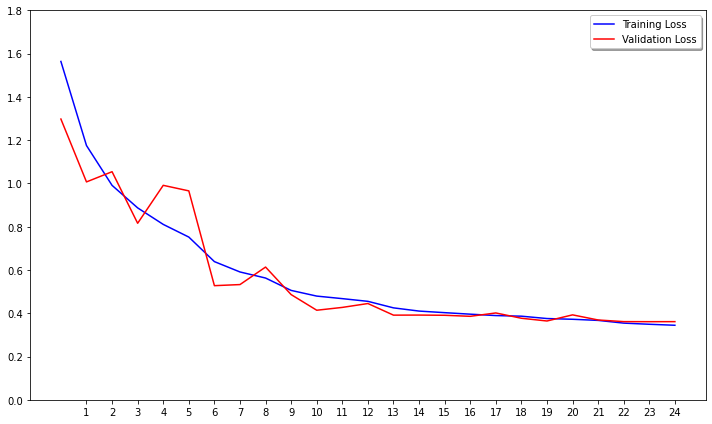

In [26]:
#loss vs epoch plot
fig, ax1 = plt.subplots(1, 1, figsize=(10, 6))
ax1.plot(history.history['loss'], color='b', label="Training Loss")
ax1.plot(history.history['val_loss'], color='r', label="Validation Loss")
ax1.set_xticks(np.arange(1, epochs, 1))
ax1.set_yticks(np.arange(0, 2, 0.2))

legend = plt.legend(loc='best', shadow=True)
plt.tight_layout()
plt.show()

In [27]:
#checking model performance on test data
test_loss, test_acc = model.evaluate(X_test, y_test, verbose = 2)
print('Test loss:', test_loss) 
print('Test accuracy:', test_acc)

188/188 - 1s - loss: 0.3703 - accuracy: 0.8775
Test loss: 0.37033963203430176
Test accuracy: 0.8774999976158142
